# The Loss Function

The *loss function* measures the difference between the true value and predicted value.

It gives the neural network an objective (minimize the loss).

<br/>

A common loss function in regression tasks is *mean absolute error (MAE)*, given by *abs(y_true - y pred)*.

Other common loss functions in regression are the *mean-squared error (MASE)* or the *Huber loss*.

# The Optimizer - Stochastic Gradient Descent

The *optimizer* tells the neural network *how* to solve a certain problem.

It's an algorithm that adjusts the weights to minimize the loss.

<br/>

Most belong to a family of *stochastic gradient descent (SGD)* algorithms which are iterative algorithms that train a network in steps.

The same step repeats until the loss is small enough or won't decrese any further.

Each step looks like this:

1. Sample some training data and run it through the network to make some predictions.
2. Measure the loss and between the predictions and the true values.
3. Adjust the weights in a direction that makes the loss smaller.

<br/>

Each iteration's sample of training data is called a *minibatch* or *batch*. 

A complete round of training data is called an *epoch*. The number of epochs you train for is how many times the network will see each training example.

# Learning Rate and Batch Size

The neural network only makes small changes to the weights for each batch. The size of these shifts is determined by the *learning rate*.

Learning rate and size of minibatches have the largest effect on training.

<br/>

*Adam* is an SGD algorithm that is "self-learning," taking away the need to search for hyperparamters ourselves.

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2024-01-25 21:55:12.164340: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# defining the model

features_shape = [3]

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=features_shape),
    layers.Dense(4, activation='relu'),
    layers.Dense(1)
])

In [4]:
# adding the loss and optimizer using the compile() method

model.compile(
    optimizer='adam', # we can specicify the optimizer and loss with just a string, but can also call them through the API
    loss='mae' 
)

# Practice

In [5]:
import pandas as pd

In [6]:
# setting up the training and validation data

red_wine_data = pd.read_csv('./red-wine.csv')
df_train = red_wine_data.sample(frac=0.7, random_state=0)
df_valid = red_wine_data.drop(df_train.index)

In [7]:
# scale features to fit from 0 to 1

min_ = df_train.min(axis=0)
max_ = df_train.max(axis=0)
df_train_normal = (df_train - min_) / (max_ - min_)
df_valid_normal = (df_valid - min_) / (max_ - min_)

In [8]:
# split features into input and target

X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [12]:
# get number of features

features_size = [df_train.shape[1] - 1]

In [13]:
# building a 3 layer network with 512 neurons each

model = keras.Sequential([
    layers.Dense(512, input_shape=features_size),
    layers.Activation('relu'),
    
    layers.Dense(512),
    layers.Activation('relu'),
    
    layers.Dense(512),
    layers.Activation('relu'),

    layers.Dense(1)
])

In [14]:
# compile the model and set optimizer and loss

model.compile(
    optimizer='adam',
    loss='mae'
)

In [15]:
# set bactch and epoch sizes and then start training

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10
)

Epoch 1/10
5/5 [==============================] - 2s 107ms/step - loss: 4.9476 - val_loss: 2.6326
Epoch 2/10
5/5 [==============================] - 0s 41ms/step - loss: 1.9121 - val_loss: 1.2907
Epoch 3/10
5/5 [==============================] - 0s 37ms/step - loss: 1.1459 - val_loss: 0.8580
Epoch 4/10
5/5 [==============================] - 0s 39ms/step - loss: 0.8505 - val_loss: 0.8709
Epoch 5/10
5/5 [==============================] - 0s 35ms/step - loss: 0.7218 - val_loss: 0.6179
Epoch 6/10
5/5 [==============================] - 0s 37ms/step - loss: 0.6267 - val_loss: 0.5761
Epoch 7/10
5/5 [==============================] - 0s 63ms/step - loss: 0.6018 - val_loss: 0.5574
Epoch 8/10
5/5 [==============================] - 0s 34ms/step - loss: 0.5707 - val_loss: 0.6260
Epoch 9/10
5/5 [==============================] - 0s 35ms/step - loss: 0.5910 - val_loss: 0.5985
Epoch 10/10
5/5 [==============================] - 0s 37ms/step - loss: 0.5589 - val_loss: 0.5313


<Axes: >

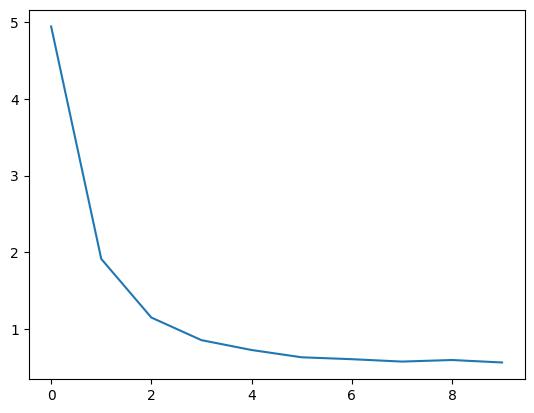

In [17]:
# view the loss using a plot

# turning the training history in to a pandas dataframe
history_df = pd.DataFrame(history.history)
history_df['loss'].plot()